In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Facet 
Facet이란 분할을 의미

* 화면 상에 View를 분할 및 추가하여 다양한 관점을 전달
    * 같은 데이터셋에 **서로 다른 인코딩**(파이차트vs바차트)을 통해 다른 인사이트 전달
    * **같은 방법으로 동시에** 여러 feature를 보거나
    * 큰 틀에서 볼 수 없는 **부분 집합을 세세**하게 보여줄 수 있다.

## 2. Matplotlib에서 구현

#### 2-1. Figure 와 Axes

* Figure는 큰 틀(언제나 1개), Ax는 각 플롯(N개)이 들어가는 공간

#### 2-2. NxM subplots

#### 구현의 3가지 방법
* plt.subplot()
* plt.figure() + fig.add_subplot()
* plt.subplots() : 동시에 여러개를 그리기

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax = fig.add_subplot(122)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2)
plt.show()

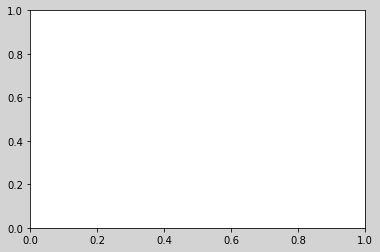

In [5]:
# 배경색을 조정할 수도 있다.
fig, ax = plt.subplots()
fig.set_facecolor('lightgray')
plt.show()

### 쉽게 조정 할 수 있는 요소
* figuresize : 비율
* dpi : 해상도
* sharex, sharey : 축 공유
* squeeze
* aspect

#### DPI(Dots per Inch)
인치에 해당하는 dot 수를 정하는 인자, 해상도를 의미한다. 기본값은 100

150, 200, 300 값 등을 조정해 원하는 해상도를 출력할 수 있다.

* 다만 높은 해상도는 출력시 시간과 메모리를 많이 잡아 먹으니, 저장시에 높은 해상도로 설정하는 방법을 택해보자

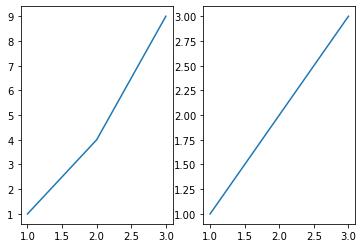

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot([1, 2, 3] , [1, 4, 9])
ax2.plot([1, 2, 3] , [1, 2, 3])
plt.show()

In [ ]:
fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot([1, 2, 3] , [1, 4, 9])
ax2.plot([1, 2, 3] , [1, 2, 3])
plt.show()

In [ ]:
# fig를 png파일을 저장
fig.savefig('file_name' , dpi=150)

#### Sharex, Sharey
개별 ax에 대해 subplots 함수를 사용할 때 `Sharex`, `Sharey`를 사용해 축을 공유 할 수 있다.

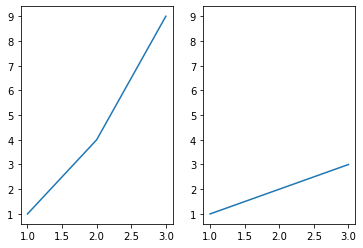

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot([1, 2, 3] , [1, 4, 9])
# ax2가 ax1의 y축을 공유함
ax2 = fig.add_subplot(122, sharey=ax1)
ax2.plot([1, 2, 3] , [1, 2, 3])
plt.show()

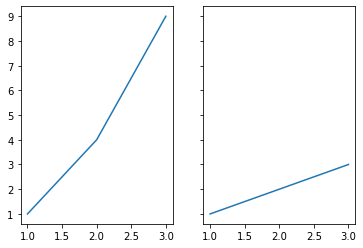

In [4]:
# subplots 사용법
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].plot([1, 2, 3] , [1, 4, 9])
axes[1].plot([1, 2, 3] , [1, 2, 3])
plt.show()

#### squeeze 와 flatten
* `squeeze`

`subplots()`으로 생성하면 기본적으로 서브플롯 ax 배열이 생성된다.
* 1 x 1 : 객체 1개(ax)
* 1 x N 또는 N x 1 : 길이 N 배열(axes[i])
* N x M : N by M 배열(axes[i][j])

numpy ndarray에서 각각 차원이 0, 1, 2 로 나타내며 반복문을 사용 할 수 있거나 없거나로 구분된다.

squeeze를 사용하면 **항상 2차원으로 배열**을 받을 수 있고, 가변크기에 대한 반복문 사용에 유용한다.

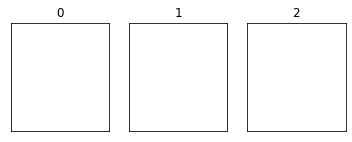

In [12]:
n, m = 1,3 # 원래는 2차원 배열로 받을 수 없지만 squeeze 옵션으로 가능

fig, axes = plt.subplots(n, m, squeeze=False, figsize=(m*2, n*2))
idx = 0
for i in range(n):
    for j in range(m):
        axes[i][j].set_title(idx)
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        idx+=1
plt.show()

for 문을 한번만 쓰고 싶다면 `flatten()` 메서드를 사용하자.

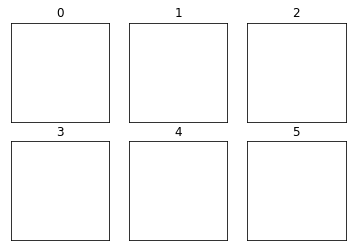

In [18]:
n, m = 2,3 # 원래는 2차원 배열로 받을 수 없지만 squeeze 옵션으로 가능

fig, axes = plt.subplots(n, m, figsize=(m*2, n*2))

for i, ax in enumerate(axes.flatten()):
    ax.set_title(i)
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

#### aspect
* `asepct`

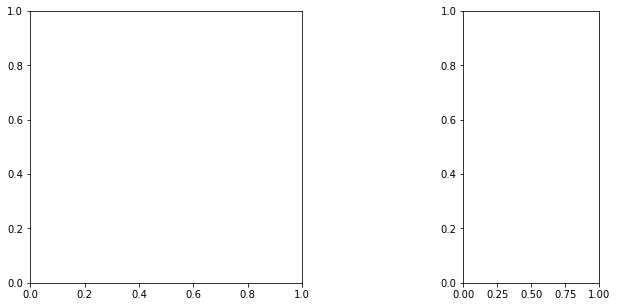

In [20]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, aspect=1)
ax2 = fig.add_subplot(122, aspect=2)
plt.show()

#### 2-3. Grid Spec의 활용
그리드 형태의 subplots
* 기존 Subplots으로 4x4 를 만들 수 있다

#### 다른 사이즈를 만들기 위한 2가지 방법
1. Slicing 
* `axes[0,:3]`, `axes[1:,:3]`, `axes[:,3]
* `fig.add_gridspec()`

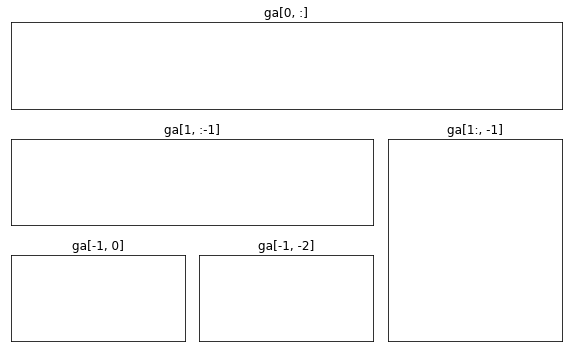

In [26]:
fig = plt.figure(figsize=(8, 5))

ga =fig.add_gridspec(3, 3) # 3 by 3 grid

ax = [None for _ in range(5)]

ax[0] = fig.add_subplot(ga[0, :])
ax[0].set_title("ga[0, :]")

ax[1] = fig.add_subplot(ga[1, :-1])
ax[1].set_title("ga[1, :-1]")

ax[2] = fig.add_subplot(ga[1:, -1])
ax[2].set_title("ga[1:, -1]")

ax[3] = fig.add_subplot(ga[-1, 0])
ax[3].set_title("ga[-1, 0]")

ax[4] = fig.add_subplot(ga[-1, -2])
ax[4].set_title("ga[-1, -2]")

for idx in range(5):
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])

plt.tight_layout()
plt.show()

2. x, y, dx,dy 사용
* `fig.subplot2grid()`

N x M 그리드에서 시작점 dleta x, delta y로 표현할 수 있다.

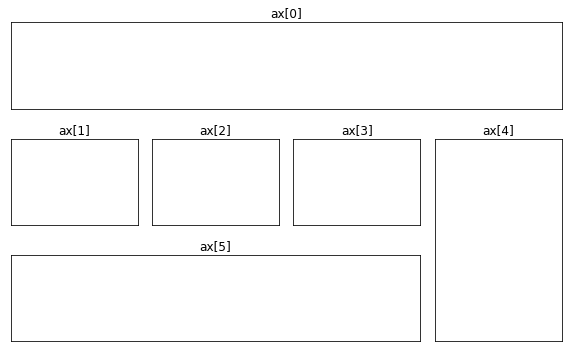

In [27]:
fig = plt.figure(figsize=(8, 5))

ax = [None for _ in range(6)]

ax[0] = plt.subplot2grid((3,4), (0,0), colspan=4)
ax[1] = plt.subplot2grid((3,4), (1,0), colspan=1)
ax[2] = plt.subplot2grid((3,4), (1,1), colspan=1)
ax[3] = plt.subplot2grid((3,4), (1,2), colspan=1)
ax[4] = plt.subplot2grid((3,4), (1,3), colspan=1, rowspan=2)
ax[5] = plt.subplot2grid((3,4), (2,0), colspan=3)

for ix in range(6):
    ax[ix].set_title(f"ax[{ix}]")
    ax[ix].set_xticks([])
    ax[ix].set_yticks([])
    
plt.tight_layout()
plt.show()

#### 2-4. 내부에 그리기
Ax 내부에 서브플롯을 추가하는 방법
1. 미내맵과 같은 형태 또는 외부 정보를 적은 비중으로 추가
    * `ax.inset_axes()`

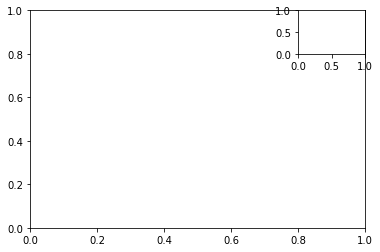

In [29]:
fig, ax = plt.subplots()
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2])
plt.show()

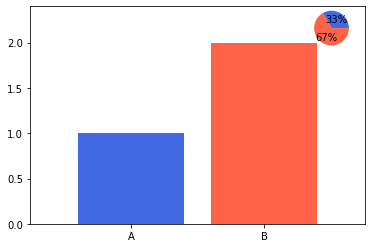

In [32]:
fig, ax = plt.subplots()

color=['royalblue', 'tomato']
ax.bar(['A','B'], [1,2],
      color=color
      )

ax.margins(0.2)
axin = ax.inset_axes([0.8, 0.8, 0.2, 0.2])
axin.pie([1,2], colors=color,
        autopct="%1.0f%%")
plt.show()

2. 그리드를 사용하지 않고 사이드에 추가
* 반향의 통계정보 또는 제목 등의 텍스트 추가도 가능
* `make_axes_locateable(ax)`

일반적으로 colorbar를 많이 활용한다.

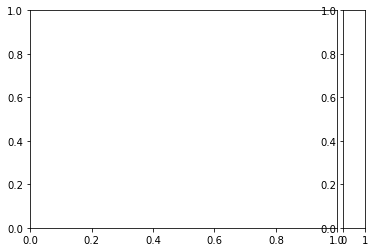

In [37]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
ax_divider = make_axes_locatable(ax)

ax = ax_divider.append_axes("right", size="7%", pad="2%")
plt.show()

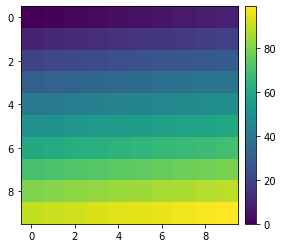

In [38]:
fig, ax = plt.subplots(1, 1)

im = ax.imshow(np.arange(100).reshape((10, 10)))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

fig.colorbar(im, cax=cax)
plt.show()